In [292]:
from google.colab import drive
drive.mount('/gdrive') 
#Change current working directory to gdrive      
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [0]:
import pandas as pd
import numpy as np


In [0]:
# income dataset

income = pd.read_csv(r'/gdrive/My Drive/Applied Project/Copy of Income estimates.csv')

In [0]:
#data_2020 = pd.read_csv(r'/gdrive/My Drive/Applied Project/Copy of 2020_data.csv')
concat_2020 = pd.read_csv(r'/gdrive/My Drive/Applied Project/Copy of concat_2020.csv')

In [0]:
concat_2020['City'] = concat_2020['City'].str.lower()
concat_2020['Retailer Name'] = concat_2020['Retailer Name'].str.lower()

In [0]:
sub = "circle k"

In [0]:
concat_2020['index'] = concat_2020['Retailer Name'].str.find(sub)

In [299]:
concat_2020.nunique()

Unnamed: 0           317067
From Date                14
To Date                  14
Week End Date            14
Retailer               2490
Retailer Name          2422
Game Number              75
Scratcher Sales        1397
Street1                2450
City                    170
Zipcode                 293
License Date           1354
# of Terminals            5
Owner Type                5
Business Type            14
Price                     8
Pk Size                   7
Pk Val                    2
Play Style               12
Theme                    12
Game Odds                50
Payout %                 63
Max LT Winners           21
Top Prize                18
Top Prize Ct             19
Top Prizes Cashed        19
Validation Status         2
Launch Dt                31
End Dist Dt              53
End Valid Dt             53
Total Bins               40
Adj_Sales              3887
index                     2
dtype: int64

In [0]:
Arco = concat_2020[(concat_2020['index'] >=0)]

In [301]:
pd.DataFrame(Arco[['Retailer Name']].groupby('Retailer Name'))


,0,1
0,circle k 0014,Retailer Name 261282 circle k 0014 26...
1,circle k 0017,Retailer Name 91012 circle k 0017 9101...
2,circle k 0039,Retailer Name 94939 circle k 0039 9494...
3,circle k 0041,Retailer Name 64532 circle k 0041 6453...
4,circle k 0052,Retailer Name 75433 circle k 0052 7543...
...,...,...
591,circle k 9191,Retailer Name 54115 circle k 9191 5411...
592,circle k 9192,Retailer Name 57178 circle k 9192 5717...
593,circle k 9193,Retailer Name 57524 circle k 9193 5752...
594,circle k 9523,Retailer Name 295829 circle k 9523 29...


In [0]:
#instructions upload the clusters_data and assing it to clusters
#step 1: clusters = your uploaded dataset
#step 2: play n_clust variables.
#step 3: choose between not scaled or scaled dataset and assing it to variable 'x'
#your welcome to tune the parameters as you see fit
#Once you find well defined clusters, take the screen shot and share your settings

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
income_raw = income.drop(columns='Zip')

numericvar = list(income_raw.columns)

mms1 = MinMaxScaler()
income_scaled = pd.DataFrame(mms1.fit_transform(income_raw[numericvar]), columns=['mms_'+x for x in numericvar])

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [0]:
#initializing k_means()

kmeans = KMeans()
n_clust = 4 # play with the number of clusters
x = income_scaled.copy() # whether you are using normalized dataset or non-normalized # {income: (income_raw, income_scaled)}
y = income.copy() # (clusters, income)

In [0]:
# setting paramaters

knn_parm = {
    'n_clusters': [n_clust],
    'init':['k-means++'],
    'n_init': range(4,20,2),
    'max_iter': range(100,350,25)
}

In [0]:
#Hyperparameter tuning

#kmeans_random = RandomizedSearchCV(kmeans,knn_parm,n_iter=15)
#kmeans_random.fit(x)
#grid_parm_knn=kmeans_random.best_params_
#print(grid_parm_knn)

In [309]:
#fitting 

kmeans = KMeans(n_clusters=n_clust)
kmeans.fit(x)
print(silhouette_score(x, kmeans.labels_))

0.3902051076693696


In [0]:
#predict

k_means = kmeans.predict(x)

In [320]:
#add predicted labels to clusters dataset

y.insert((y.shape[1]),'k_means',k_means)

ValueError: ignored

In [0]:
import matplotlib.pyplot as plt

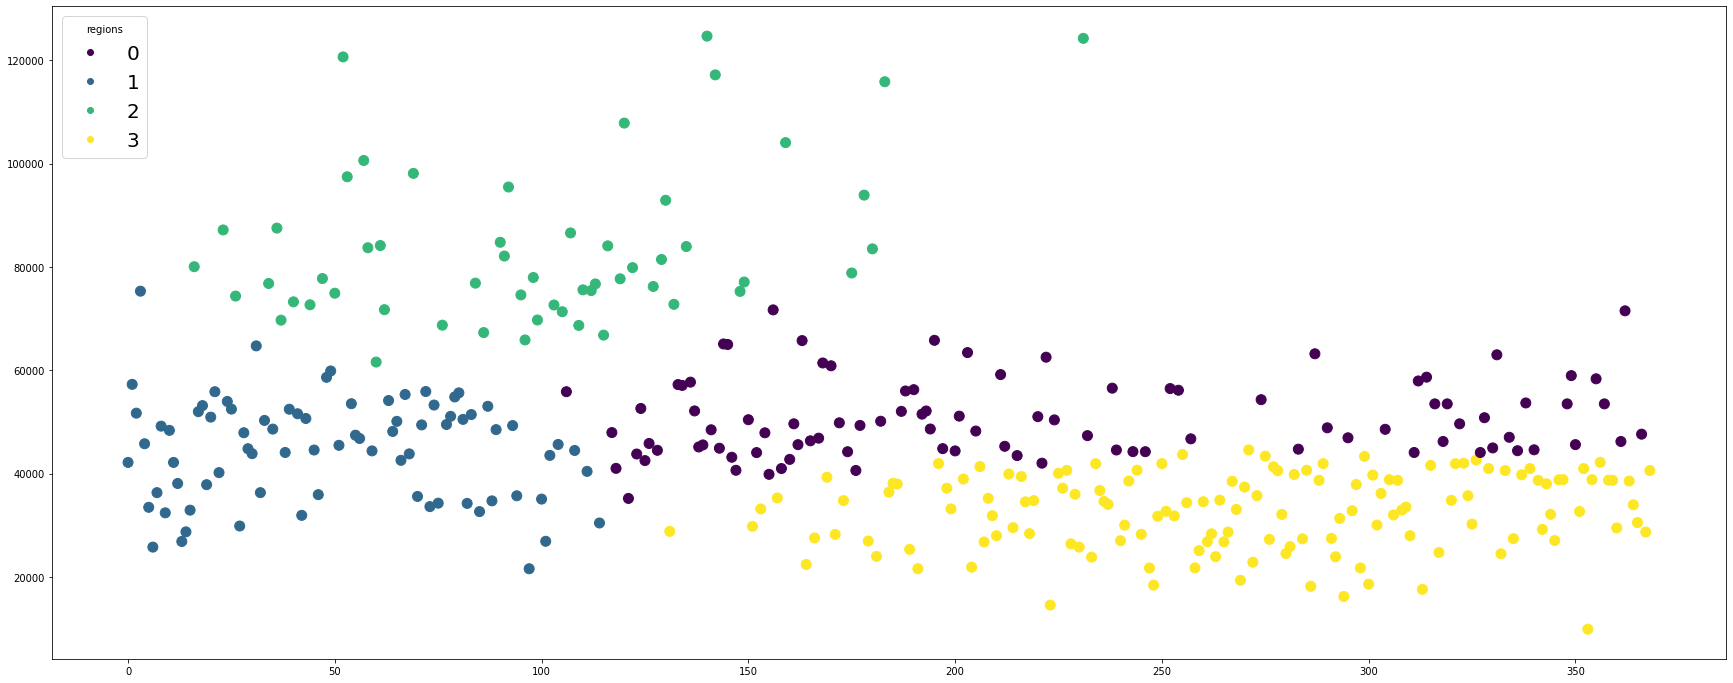

In [313]:
# plotting median income

plt.figure(figsize=(30,12))

for i in range(1,2):
  exec(f'scatter_{i} = plt.scatter(y.index, y.iloc[:,i],c=k_means,s= 100)')
  exec(f'legend_{i} = plt.legend(*scatter_{i}.legend_elements(), loc="upper left",title="regions", fontsize=20)')
  


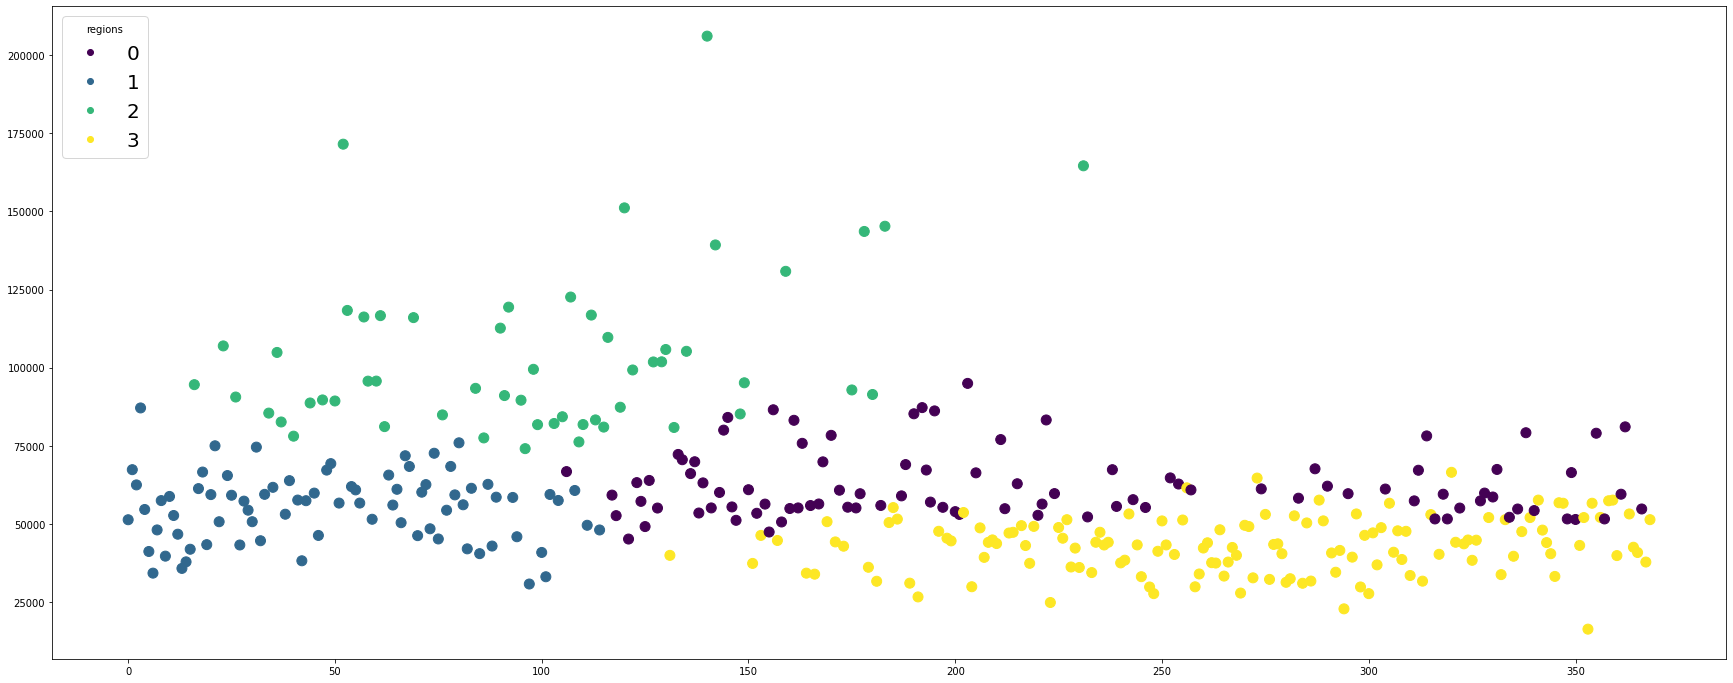

In [314]:
# plotting mean income

plt.figure(figsize=(30,12))

for i in range(2,3):
  exec(f'scatter_{i} = plt.scatter(y.index, y.iloc[:,i],c=k_means, s= 100, label="marker")')
  exec(f'legend_{i} = plt.legend(*scatter_{i}.legend_elements(), loc="upper left",title="regions", fontsize=20)')

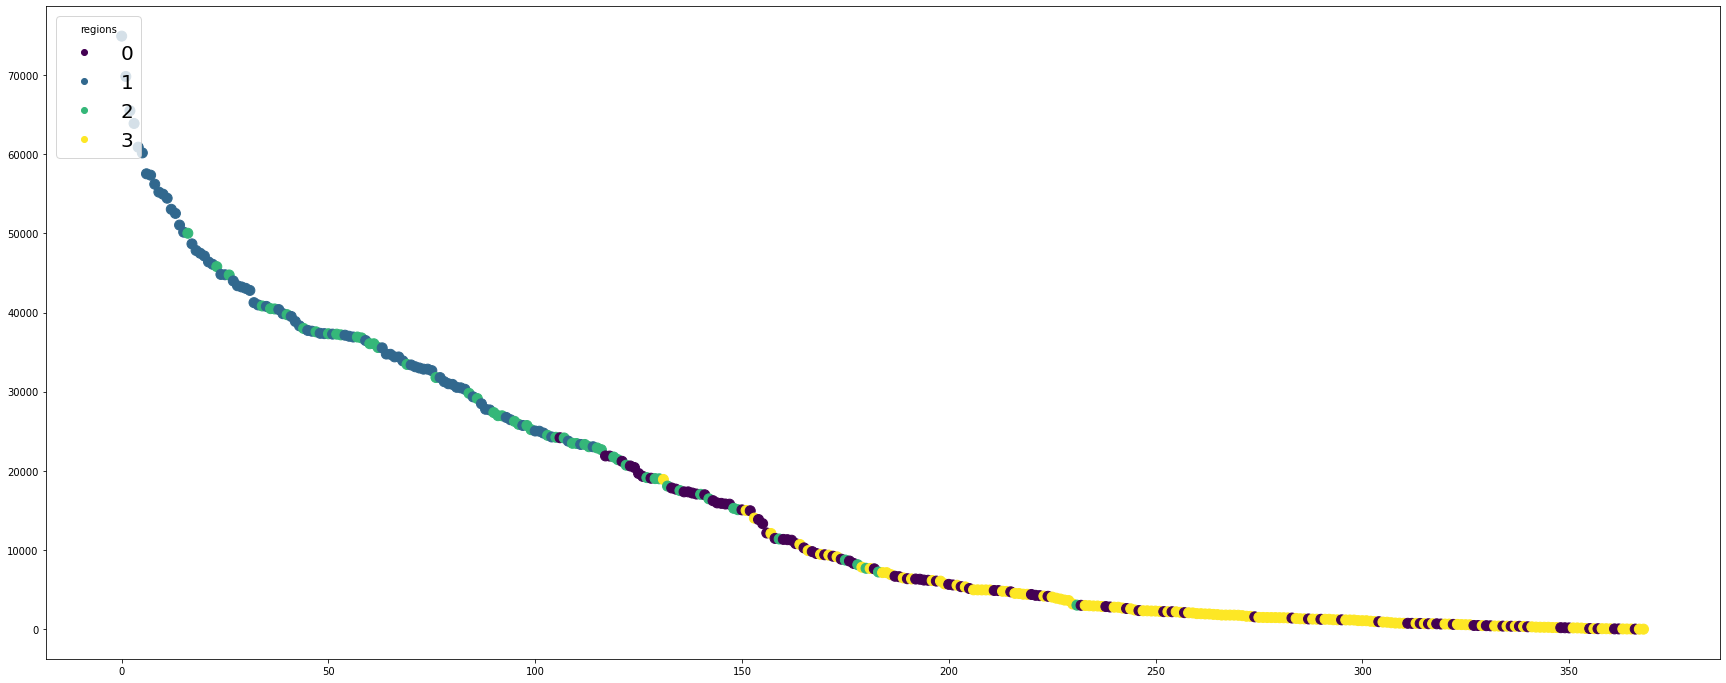

In [315]:
# plotting population

plt.figure(figsize=(30,12))

for i in range(3,4):
  exec(f'scatter_{i} = plt.scatter(y.index, y.iloc[:,i],c=k_means, s= 100, label="color")')
  exec(f'legend_{i} = plt.legend(*scatter_{i}.legend_elements(), loc="upper left",title="regions", fontsize=20)')

In [0]:
pd.DataFrame(k_means).to_csv(r'/gdrive/My Drive/Applied Project/Clusters_nonnormalized_CircleK.csv')

In [0]:
new_data = concat_2020[['Retailer','Retailer Name','Zipcode','Play Style','Theme','Price','Payout %','Scratcher Sales']]

In [0]:
new_data = new_data.merge(y, how='inner',left_on='Zipcode', right_on='Zip')

In [0]:
cities = concat_2020[(concat_2020['City'] == 'phoenix')|(concat_2020.City == 'mesa')|(concat_2020.City == 'scottsdale')|(concat_2020.City == 'chandler')|(concat_2020.City == 'tempe')|(concat_2020.City == 'prescott')\
                     |(concat_2020.City == 'tucson')|(concat_2020.City == 'sun city')]


In [0]:
# game price or game style or theme

cat = 'Price'  # ('Play Style','Theme','Price')

In [0]:
pivoted = cities.pivot_table(index='City', columns=cat,values='Scratcher Sales', aggfunc=np.average)

In [0]:
plt.rcParams['figure.figsize'] = (30,12)

pivoted.plot.bar(rot=0, )

In [0]:
pivoted = cities.pivot_table(index='City', columns=cat,values='Scratcher Sales', aggfunc=np.sum)

pivoted.plot.bar(rot=0, )

In [0]:
pivoted1 = new_data.pivot_table(index='k_means', columns=cat,values='Scratcher Sales', aggfunc=np.average)

pivoted1.plot.bar(rot=0, )

In [0]:
pivoted1 = new_data.pivot_table(index='k_means', columns=cat,values='Scratcher Sales', aggfunc=np.sum)

pivoted1.plot.bar(rot=0, )

In [0]:
# slicing dataframe by criterion
#for i in range(n_clust):
  #exec(f'df_{i} = pd.DataFrame(data =x[x.k_means==i])')
  
  
  
  

In [0]:
#regions = ['region_'+ str(i) for i in range(n_clust)]